In [46]:
#Importing initial libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#this will allow matplotlib to render graphs within jupyter notebook
%matplotlib inline

In [47]:
# reading yelp.csv data file

yelp = pd.read_csv('yelp.csv')

In [48]:
#Checking yelp data head(), info() and describe() to get some insight.

yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [49]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 546.9+ KB


In [50]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


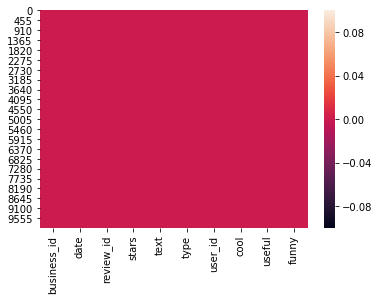

In [51]:
#checking if the dataset has any null values:

sns.heatmap(yelp.isnull())

In [52]:
#creating a new column called 'Text length' to show the number of text chars in each text field.
#creating a function to count length

def countlen (x):
    return len(x)

In [53]:
#applying function to text column for char length

yelp['text length'] = yelp['text'].apply(countlen)

In [54]:
#Checking yelp dataframe's head.

yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [55]:
#Exploring the Data
#Visualizations:

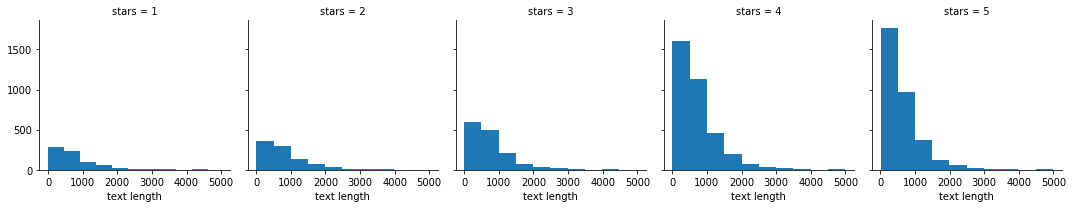

In [56]:
graph = sns.FacetGrid(yelp, col = 'stars')
graph.map(plt.hist,'text length')

#this shows that higher star rating reviews has more reviews

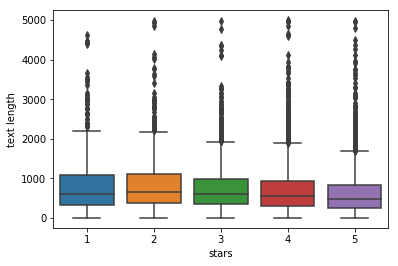

In [57]:
#creating a boxplot between ratings and number of text

sns.boxplot(y='text length', x = 'stars', data = yelp)

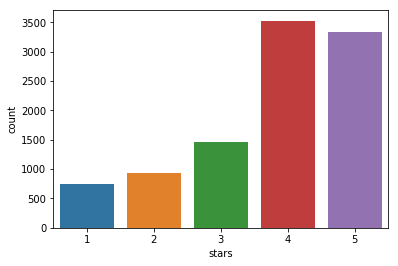

In [58]:
#creating a countplot for number of occurance for each star rating.
#shows there are more 4 and 5 rating stars than 1,2,3

sns.countplot(x='stars', data = yelp)

In [59]:
# grouping by star count and getting their mean.

stars = yelp.groupby('stars').mean()

In [60]:
#checking head of stars (rating stars) dataframe

stars.head()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


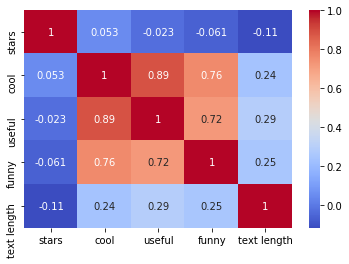

In [61]:
#creating a heatmap for correlation

sns.heatmap(yelp.corr(),cmap = 'coolwarm', annot=True)

In [62]:
#NLP Classification
#Sequence:
# import CountVectorizer
# fit_transform X (yelp_class['text']) and override X
# import train_test_split
# split x and y in train/test
# import multinomialNB (Naive bayes)
# fit training set to Naive Bayes
# predict using test set based on fitted model 
# import classification report.
# run classification report.


In [63]:
#selecting only 1 and 5 star ratings to classify.
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [64]:
# to check the number of 1 and 5 star ratings in yelp_class
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [65]:
#creating X and y for classification algorithm.
X = yelp_class['text']
y = yelp_class['stars']

In [66]:
#importing countVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
#initializing CountVectorizer
cv = CountVectorizer()

In [68]:
#fit_transforming X (text) and overriding X
X = cv.fit_transform(X)

In [69]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [70]:
#spliting train and test at 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
#importing multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [72]:
# initializing nb
nb = MultinomialNB()

In [73]:
#fitting our training set to nb
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
#predicing the output from the model on X_test
predict = nb.predict(X_test)

In [75]:
#importing classification report
from sklearn.metrics import classification_report

In [76]:
#printing a classificationn report based on predict and y_test
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [77]:
#Using Text Processing using pipeline:
#Sequence:
# import TfidfTransformer from sklearn.feature_extraction.text
# import Pipeline from sklearn.Pipeline
# Create a pipeline object using:
    # CountVectorizer
    # tfidfTransformer
    # Naive Bayes classifer
# fit the training set with pipeline
# predict values using pipeline and test set
# run classification_report

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer

In [79]:
from sklearn.pipeline import Pipeline

#creating different pipelines to check their efficiency on current dataset.

In [80]:
pipeline1 = Pipeline ([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('Classifier',MultinomialNB()) 
])

In [81]:
X = yelp_class['text']
y = yelp_class['stars']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [83]:
pipeline1.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...f=False, use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [84]:
predict = pipeline1.predict(X_test)

In [97]:
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



In [92]:
#putting the manual process before pipeline1 into a swift pipeline 2
pipeline2 = Pipeline ([
    ('cv', CountVectorizer()),
    ('Classifier',MultinomialNB()) 
])

In [93]:
pipeline2.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [94]:
predict2 = pipeline2.predict(X_test)

In [95]:
print (classification_report(y_test, predict2))

              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226



In [98]:
#importing random forest Classified
from sklearn.ensemble import RandomForestClassifier

In [111]:
pipeline3 = Pipeline([
    ('cv', CountVectorizer()),
    ('tfdif', TfidfTransformer()),
    ('randForest', RandomForestClassifier())
    ])

In [115]:
pipeline3.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [113]:
predict3 = pipeline3.predict(X_test)

In [114]:
print (classification_report(y_test, predict3))

              precision    recall  f1-score   support

           1       0.82      0.39      0.53       228
           5       0.87      0.98      0.92       998

   micro avg       0.87      0.87      0.87      1226
   macro avg       0.85      0.68      0.73      1226
weighted avg       0.87      0.87      0.85      1226

